In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from MCForecastTools import MCSimulation
import hvplot.pandas
import seaborn as sns


%matplotlib inline

In [2]:
# Load the environment variables from the .env file by calling the load_dotenv function
load_dotenv()

True

In [3]:
btc_df =  pd.read_csv(Path("./Resources/BTC_USD_2013-09-30_2021-05-13-CoinDesk.csv"),
    index_col="Date",  
    parse_dates=True, 
    infer_datetime_format=True)

eth_df = pd.read_csv(Path("./Resources/ETH_USD_2015-08-08_2021-05-13-CoinDesk.csv"),
    index_col="Date",  
    parse_dates=True, 
    infer_datetime_format=True)

xrp_df = pd.read_csv(Path("./Resources/XRP_USD_2018-05-31_2021-05-13-CoinDesk.csv"),
    index_col="Date",  
    parse_dates=True, 
    infer_datetime_format=True)

ltc_df = pd.read_csv(Path("./Resources/LTC_USD_2018-05-31_2021-05-13-CoinDesk.csv"),
    index_col="Date",  
    parse_dates=True, 
    infer_datetime_format=True)

sp500_df = pd.read_csv(Path("./Resources/SP500.csv"),
    index_col="Date", 
    dtype={
       "Closing Price (USD)":np.float64
    },
    parse_dates=True, 
    infer_datetime_format=True)


djia_df = pd.read_csv(Path("./Resources/DJIA.csv"),
    index_col="Date", 
    dtype={
       "Closing Price (USD)":np.float64
    },
    parse_dates=True, 
    infer_datetime_format=True)

nasdaq100_df = pd.read_csv(Path("./Resources/NASDAQ100.csv"),
    index_col="Date", 
    dtype={
       "Closing Price (USD)":np.float64
    },
    parse_dates=True, 
    infer_datetime_format=True)
#sp500_df.dtypes


In [4]:
display(btc_df.tail() )
display(eth_df.head() )
display(xrp_df.head() )
display(ltc_df.head() )
display(sp500_df.head())
display(djia_df.head())
display(nasdaq100_df.tail())

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-09,BTC,58102.191426,58966.915010,59249.141676,56494.915334
2021-05-10,BTC,55715.546651,58308.318048,59560.025459,53774.628243
2021-05-11,BTC,56573.555472,55899.752971,56956.075029,54571.693210
2021-05-12,BTC,52147.821187,56767.711063,58036.509777,51625.547849
2021-05-13,BTC,49764.132082,49596.778891,51448.798576,46294.720180


,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2015-08-08,ETH,0.909046,1.749289,1.916540,0.794497
2015-08-09,ETH,0.692321,0.909046,0.909046,0.692321
2015-08-10,ETH,0.668067,0.692321,0.692321,0.654331
2015-08-11,ETH,0.850151,0.668067,1.148621,0.668067
2015-08-12,ETH,1.266023,0.850151,1.266023,0.850151


,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2018-05-31,XRP,0.609705,0.616405,0.618404,0.607282
2018-06-01,XRP,0.617604,0.614872,0.621169,0.608681
2018-06-02,XRP,0.643043,0.624189,0.650921,0.618503
2018-06-03,XRP,0.667634,0.644291,0.677069,0.640769
2018-06-04,XRP,0.669680,0.690562,0.706326,0.643054


,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2018-05-31,LTC,117.475053,118.974662,119.628628,117.006761
2018-06-01,LTC,119.934676,118.307052,120.452653,117.390816
2018-06-02,LTC,123.222694,120.171853,124.229394,118.542360
2018-06-03,LTC,125.365456,123.500674,127.920242,122.112908
2018-06-04,LTC,119.522003,124.869538,126.883812,118.303633


,Closing Price (USD)
Date,
2016-05-13,2046.61
2016-05-16,2066.66
2016-05-17,2047.21
2016-05-18,2047.63
2016-05-19,2040.04


,Closing Price (USD)
Date,
2016-05-13,17535.32
2016-05-16,17710.71
2016-05-17,17529.98
2016-05-18,17526.62
2016-05-19,17435.40


,Closing Price (USD)
Date,
2021-05-10,13359.08
2021-05-11,13351.27
2021-05-12,13001.63
2021-05-13,13109.15
2021-05-14,13393.12


In [5]:
star_date_btc = btc_df.loc["2018-05-31" :]

star_date_eth = eth_df.loc["2018-05-31" :] 

star_date_xrp = xrp_df.loc["2018-05-31" :]

star_date_ltc = ltc_df.loc["2018-05-31" :]

start_date_sp500_df = sp500_df.loc["2018-05-31" :]

start_date_djia_df = djia_df.loc["2018-05-31" :]

start_date_nasdaq100_df = nasdaq100_df.loc["2018-05-31" :]

display(star_date_btc.head() )
display(star_date_eth.head() )
display(star_date_xrp.head() )
display(star_date_ltc.head() )
display(start_date_sp500_df.head())
display(start_date_djia_df.head())
display(start_date_nasdaq100_df.head())

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2018-05-31,BTC,7490.621250,7540.810522,7614.063908,7361.565000
2018-06-01,BTC,7518.333329,7494.065482,7599.180474,7393.287588
2018-06-02,BTC,7630.403388,7516.612569,7696.542926,7450.698017
2018-06-03,BTC,7716.145068,7638.232021,7774.829285,7600.263944
2018-06-04,BTC,7505.589277,7706.639829,7760.178308,7451.523947


,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2018-05-31,ETH,570.865740,579.714110,583.906997,566.401273
2018-06-01,ETH,577.257364,576.075224,585.536316,562.263880
2018-06-02,ETH,591.381123,576.481510,597.747636,571.242485
2018-06-03,ETH,618.302767,589.862747,627.715453,589.354724
2018-06-04,ETH,591.549075,618.234340,625.133239,579.802136


,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2018-05-31,XRP,0.609705,0.616405,0.618404,0.607282
2018-06-01,XRP,0.617604,0.614872,0.621169,0.608681
2018-06-02,XRP,0.643043,0.624189,0.650921,0.618503
2018-06-03,XRP,0.667634,0.644291,0.677069,0.640769
2018-06-04,XRP,0.669680,0.690562,0.706326,0.643054


,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2018-05-31,LTC,117.475053,118.974662,119.628628,117.006761
2018-06-01,LTC,119.934676,118.307052,120.452653,117.390816
2018-06-02,LTC,123.222694,120.171853,124.229394,118.542360
2018-06-03,LTC,125.365456,123.500674,127.920242,122.112908
2018-06-04,LTC,119.522003,124.869538,126.883812,118.303633


,Closing Price (USD)
Date,
2018-05-31,2705.27
2018-06-01,2734.62
2018-06-04,2746.87
2018-06-05,2748.80
2018-06-06,2772.35


,Closing Price (USD)
Date,
2018-05-31,24415.84
2018-06-01,24635.21
2018-06-04,24813.69
2018-06-05,24799.98
2018-06-06,25146.39


,Closing Price (USD)
Date,
2018-05-31,6967.730
2018-06-01,7083.926
2018-06-04,7143.570
2018-06-05,7166.754
2018-06-06,7210.082


In [6]:
start_date_sp500_df['Currency'] = "SP500"
start_date_sp500_df = start_date_sp500_df.reindex(columns=['Currency', 'Closing Price (USD)'])
display(start_date_sp500_df.head())


start_date_djia_df['Currency'] = "DJIA"
start_date_djia_df = start_date_djia_df .reindex(columns=['Currency', 'Closing Price (USD)'])
display(start_date_djia_df.head())



start_date_nasdaq100_df['Currency'] = "NASDAQ100"
start_date_nasdaq100_df = start_date_nasdaq100_df.reindex(columns=['Currency', 'Closing Price (USD)'])
display(start_date_nasdaq100_df.head())


C:\Users\torne\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Currency,Closing Price (USD)
Date,,
2018-05-31,SP500,2705.27
2018-06-01,SP500,2734.62
2018-06-04,SP500,2746.87
2018-06-05,SP500,2748.80
2018-06-06,SP500,2772.35


C:\Users\torne\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Currency,Closing Price (USD)
Date,,
2018-05-31,DJIA,24415.84
2018-06-01,DJIA,24635.21
2018-06-04,DJIA,24813.69
2018-06-05,DJIA,24799.98
2018-06-06,DJIA,25146.39


C:\Users\torne\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,Currency,Closing Price (USD)
Date,,
2018-05-31,NASDAQ100,6967.730
2018-06-01,NASDAQ100,7083.926
2018-06-04,NASDAQ100,7143.570
2018-06-05,NASDAQ100,7166.754
2018-06-06,NASDAQ100,7210.082


In [7]:
btc_closing_prices = star_date_btc.loc[:,["Currency","Closing Price (USD)"]]

eth_closing_prices = star_date_eth.loc[:,["Currency","Closing Price (USD)"]]

ltc_closing_prices = star_date_ltc.loc[:,["Currency","Closing Price (USD)"]]

xrp_closing_prices =  star_date_xrp.loc[:,["Currency","Closing Price (USD)"]]



crypto_currencies_closing = [btc_closing_prices, eth_closing_prices, ltc_closing_prices, 
                             xrp_closing_prices, start_date_sp500_df, start_date_djia_df, start_date_nasdaq100_df]
crypto_currencies_closing 
crypto_currencies_closing_df = pd.concat(crypto_currencies_closing) 
crypto_currencies_closing_df

,Currency,Closing Price (USD)
Date,,
2018-05-31,BTC,7490.621250
2018-06-01,BTC,7518.333329
2018-06-02,BTC,7630.403388
2018-06-03,BTC,7716.145068
2018-06-04,BTC,7505.589277
...,...,...
2021-05-10,NASDAQ100,13359.080000
2021-05-11,NASDAQ100,13351.270000
2021-05-12,NASDAQ100,13001.630000


In [8]:
pivot_crypto_currencies_closing_df = crypto_currencies_closing_df.pivot(columns="Currency")

pivot_crypto_currencies_closing_drop_df = pivot_crypto_currencies_closing_df.dropna()

In [9]:
pivot_crypto_currencies_closing_drop_df['Closing Price (USD)'].astype(float)
pivot_crypto_currencies_closing_drop_df.dtypes

                     Currency 
Closing Price (USD)  BTC          float64
                     DJIA         float64
                     ETH          float64
                     LTC          float64
                     NASDAQ100    float64
                     SP500        float64
                     XRP          float64
dtype: object

In [10]:
pivot_crypto_currencies_closing_drop_df.describe(include="all")

Closing Price (USD)                                         \
Currency                 BTC          DJIA          ETH         LTC   
count             744.000000    744.000000   744.000000  744.000000   
mean            13536.041607  27047.162379   461.812059   80.309239   
std             14206.852747   2682.448812   620.397370   56.759866   
min              3212.207081  18591.930000    83.368456   22.864239   
25%              6478.807799  25414.917500   171.343026   46.414786   
50%              8758.926890  26502.800000   226.913026   58.858453   
75%             11267.469496  28325.530000   409.072095   88.159547   
max             63346.789035  34777.760000  4132.757546  371.689785   

                                                 
Currency     NASDAQ100        SP500         XRP  
count       744.000000   744.000000  744.000000  
mean       9131.182586  3116.446895    0.367287  
std        2247.822243   419.026612    0.237358  
min        5899.355000  2237.400000    0.138613  
25%        7401.704250  2817.850000    0.245836  
50%        8013.779000  2978.570000    0.303275  
75%       11085.726500  3348.620000    0.433335  
max       14041.910000  4232.600000    1.809823

In [11]:

pivot_crypto_currencies_closing_drop_df.columns

MultiIndex([('Closing Price (USD)',       'BTC'),
            ('Closing Price (USD)',      'DJIA'),
            ('Closing Price (USD)',       'ETH'),
            ('Closing Price (USD)',       'LTC'),
            ('Closing Price (USD)', 'NASDAQ100'),
            ('Closing Price (USD)',     'SP500'),
            ('Closing Price (USD)',       'XRP')],
           names=[None, 'Currency'])

In [12]:
pivot_crypto_currencies_closing_drop_df['Closing Price (USD)'].hvplot(x='Date',
                                 xlabel="Date", 
                                 title = "Cryptocurrencies",
                                 width = 1000,height=500)


:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [13]:
crypto_currencies_closing_df.hvplot(x='Date', groupby="Currency", xlabel="Date", title = "Cryptocurrencies", width = 1000,height=500)

:DynamicMap   [Currency]
   :Curve   [Date]   (Closing Price (USD))

In [14]:
pivot_crypto_currencies_closing_return_df = pivot_crypto_currencies_closing_drop_df.pct_change().dropna()
pivot_crypto_currencies_closing_return_df

Closing Price (USD)                                          \
Currency                   BTC      DJIA       ETH       LTC NASDAQ100   
Date                                                                     
2018-06-01            0.003700  0.008985  0.011196  0.020937  0.016676   
2018-06-04           -0.001695  0.007245  0.024758 -0.003441  0.008420   
2018-06-05            0.015801 -0.000553  0.027522  0.021391  0.003245   
2018-06-06            0.004510  0.013968 -0.002714 -0.004864  0.006046   
2018-06-07            0.003442  0.003779 -0.004322  0.000044 -0.007940   
...                        ...       ...       ...       ...       ...   
2021-05-07            0.009248  0.006635 -0.027246 -0.026497  0.007779   
2021-05-10           -0.024368 -0.001005  0.160644  0.096708 -0.026280   
2021-05-11            0.015400 -0.013633  0.033470  0.012491 -0.000585   
2021-05-12           -0.078230 -0.019887 -0.013501 -0.092907 -0.026188   
2021-05-13           -0.045710  0.012915 -0.076006 -0.073251  0.008270   

                                
Currency       SP500       XRP  
Date                            
2018-06-01  0.010849  0.012955  
2018-06-04  0.004480  0.084320  
2018-06-05  0.000703  0.014023  
2018-06-06  0.008567 -0.008166  
2018-06-07 -0.000714  0.005555  
...              ...       ...  
2021-05-07  0.007373 -0.054635  
2021-05-10 -0.010436 -0.086326  
2021-05-11 -0.008674  0.026663  
2021-05-12 -0.021449 -0.066699  
2021-05-13  0.012173 -0.012137  

[743 rows x 7 columns]

<AxesSubplot:title={'center':'Daily return'}, xlabel='Date'>

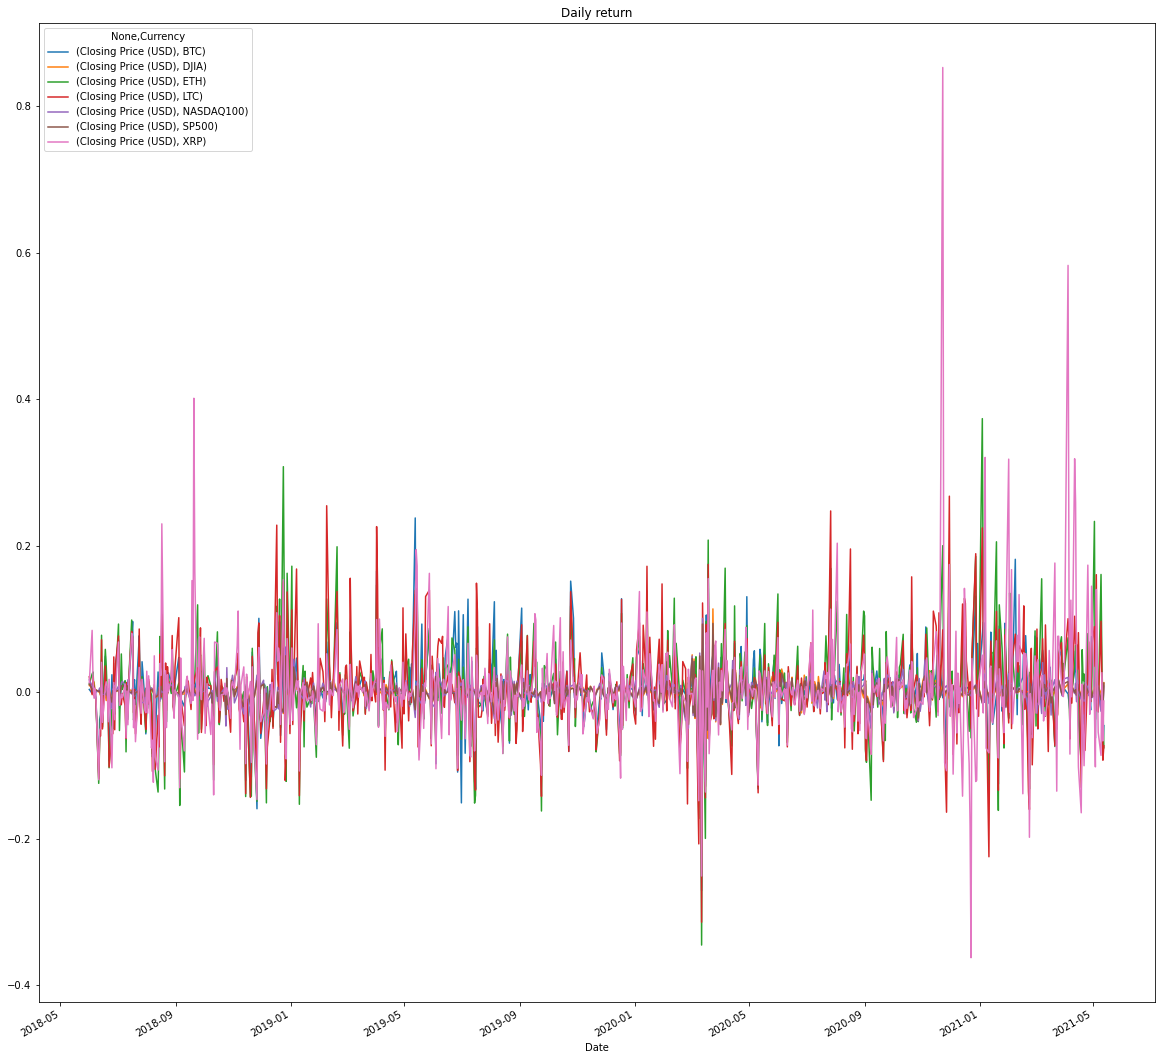

In [15]:
pivot_crypto_currencies_closing_return_df.plot(figsize = (20,20), title = "Daily return")

In [16]:

pivot_crypto_currencies_closing_return_df ['Closing Price (USD)'].hvplot.box(xlabel="Date", title = "Cryptocurrencies Daily Returns volatily", width = 1000, height=500)


:BoxWhisker   [Variable]   (value)

In [17]:
#Cumulative returns

cumulative_returns_df = (1 + pivot_crypto_currencies_closing_return_df).cumprod().dropna() 

cumulative_returns_df.head()


Closing Price (USD)                                          \
Currency                   BTC      DJIA       ETH       LTC NASDAQ100   
Date                                                                     
2018-06-01            1.003700  1.008985  1.011196  1.020937  1.016676   
2018-06-04            1.001998  1.016295  1.036232  1.017425  1.025236   
2018-06-05            1.017831  1.015733  1.064750  1.039188  1.028564   
2018-06-06            1.022421  1.029921  1.061861  1.034133  1.034782   
2018-06-07            1.025940  1.033813  1.057271  1.034179  1.026566   

                                
Currency       SP500       XRP  
Date                            
2018-06-01  1.010849  1.012955  
2018-06-04  1.015377  1.098367  
2018-06-05  1.016091  1.113770  
2018-06-06  1.024796  1.104675  
2018-06-07  1.024064  1.110812

In [18]:
cumulative_returns_df['Closing Price (USD)'].hvplot(title="Cumulative Returns Cryptocurrencies", width = 1000, height=500)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [19]:
pivot_crypto_currencies_closing_return_df.mean()

                     Currency 
Closing Price (USD)  BTC          0.003550
                     DJIA         0.000564
                     ETH          0.004285
                     LTC          0.003126
                     NASDAQ100    0.000993
                     SP500        0.000671
                     XRP          0.003426
dtype: float64

In [20]:
pivot_crypto_currencies_closing_return_df.std()

                     Currency 
Closing Price (USD)  BTC          0.044661
                     DJIA         0.015296
                     ETH          0.059263
                     LTC          0.060329
                     NASDAQ100    0.016840
                     SP500        0.014611
                     XRP          0.072538
dtype: float64

In [21]:
#Correlation
correlation_cryptocurrencies = pivot_crypto_currencies_closing_return_df.corr()
correlation_cryptocurrencies

Closing Price (USD)                      \
Currency                                      BTC      DJIA       ETH   
                    Currency                                            
Closing Price (USD) BTC                  1.000000  0.173690  0.763228   
                    DJIA                 0.173690  1.000000  0.207660   
                    ETH                  0.763228  0.207660  1.000000   
                    LTC                  0.781240  0.179523  0.813104   
                    NASDAQ100            0.183298  0.844429  0.202696   
                    SP500                0.185274  0.973383  0.212004   
                    XRP                  0.460920  0.165519  0.566911   

                                                                       
Currency                            LTC NASDAQ100     SP500       XRP  
                    Currency                                           
Closing Price (USD) BTC        0.781240  0.183298  0.185274  0.460920  
                    DJIA       0.179523  0.844429  0.973383  0.165519  
                    ETH        0.813104  0.202696  0.212004  0.566911  
                    LTC        1.000000  0.188100  0.189586  0.534877  
                    NASDAQ100  0.188100  1.000000  0.927506  0.176465  
                    SP500      0.189586  0.927506  1.000000  0.176517  
                    XRP        0.534877  0.176465  0.176517  1.000000

<AxesSubplot:xlabel='None-Currency', ylabel='None-Currency'>

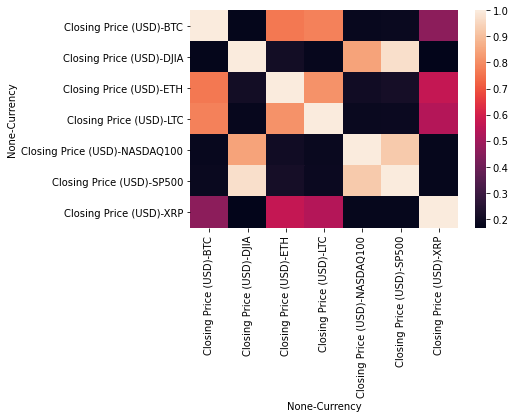

In [22]:
#Visualize the correlation
#correlation_cryptocurrencies["Closing Price (USD)"].hvplot.heatmap( x= "Currency", y="Currency", width = 1000, height=500)
sns.heatmap(correlation_cryptocurrencies)